<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe10-TopologicalSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento topológico

**Entrada**: Grafo dirigido sin ciclos $G=(V,E)$.

**Salida**: Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v) < f(w)$.

El ordenamiento topológico consiste en ordenar los vértices de un grafo $G$, de modo que cada nodo aparezca primero que sus descendientes. Esta propiedad deberá cumplirse para todos los nodos del grafo.

<img src="https://drive.google.com/uc?export=view&id=1gBqQ6sVMzLmZrcZm1nV2bbrHIo9CA4SC" width="800"/>

Para encontrar un orden topológico, no pueden existir ciclos en el grafo. Esto se puede notar fácilmente en la siguiente imagen.

<img src="https://drive.google.com/uc?export=view&id=1uLZ5NZxA_Jx-VEibIMVKKib9zhZOsbY_" width="300"/>

En este ejemplo, para cada par de nodos $(a, b)$ existe un camino $a \leadsto b$ y $b \leadsto a$. ¿Cuál nodo consideramos como descendiente del otro? En este caso, no es posible aplicar un ordenamiento topológico, pues es imposible respetar las restricciones de precedencia. Por lo tanto, el orden topológico solo es factible en un **grafo dirigido sin ciclos** (DAG).

El problema del orden topológico posee muchas aplicaciones, pues se puede aplicar en cualquier ámbito en que existan **relaciones de dependencia** entre los nodos. Por ejemplo, podría aplicarse para ordenar los ramos o asignaturas de la universidad en base a sus prerrequisitos. También se puede aplicar en la detección de ciclos en un grafo. Por ejemplo, el lenguaje de programación **Java** utiliza este algoritmo para manejar las relaciones de herencia entre clases, las cuales no pueden tener ciclos.


# 2. Topological Sort

## 2.1 Código

### Funciones auxiliares

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()

  for i in graph.keys():
    nxdigraph.add_node(i, symbol=None, order=None, state=0)
    for v in graph[i]:
      nxdigraph.add_node(v, symbol=None, order=None, state=0)
      nxdigraph.add_edge(i, v)

  for n in nxdigraph.nodes():
    nxdigraph.nodes[n]['symbol'] = chr(ord('a') + n)

  return nxdigraph

def draw_graph(G):
  labels = dict()

  for i in G.nodes():
    labels[i] = G.nodes[i]['symbol'] + '\n' + str(G.nodes[i]['order'])

  pos = nx.spring_layout(G,k=10,seed=1)
  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='black')
  plt.show()
  plt.close()

### Topological Sort (DFS iterativo)

In [17]:
from termcolor import colored

# 0: No descubierto
# 1: Descubierto
# 2: Visitado

def DFS_iterativo(G, initial, cont, verbose=False):
  S = list()
  S.append(initial)

  while len(S) > 0:
    n = S.pop()

    if G.nodes[n]['state'] == 0:
      G.nodes[n]['state'] = 1
      S.append(n)

      adj_list = list(reversed(list(G[n])))

      if verbose:
        print(f"Obteniendo nodos adyacentes de ", end='')
        print(f"{colored(G.nodes[n]['symbol'], 'blue')}: ", end='')
        for adj in range(len(adj_list)-1):
          print(G.nodes[adj_list[adj]]['symbol'], end='')
          print(', ', end='')
        if len(adj_list) > 0:
          print(G.nodes[adj_list[len(adj_list)-1]]['symbol'], end='')
        else:
          print('-', end='')
        print()

      for adj in adj_list:
        if G.nodes[adj]['state'] == 0:
          S.append(adj)

    elif G.nodes[n]['state'] == 1:
      G.nodes[n]['order'] = cont
      G.nodes[n]['state'] = 2

      if verbose:
        print(f"Marcando nodo {colored(G.nodes[n]['symbol'], 'blue')} ", end='')
        print(f"con etiqueta {colored(cont, 'magenta')}")

      cont -= 1

  return cont

Orden topológico:


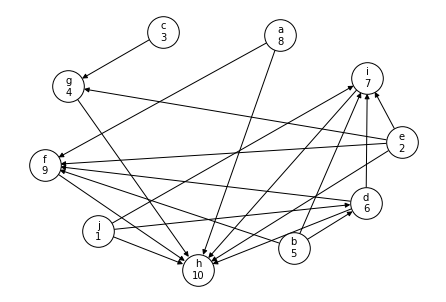

In [25]:
def topological_sort_iterativo(G, visualize=False, verbose=False):
  cont = len(G.nodes())

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      if verbose == True:
        if cont == len(G.nodes()):
          print("Comenzando recorrido post-orden desde el nodo ", end='')
        else:
          print("\nContinuando recorrido post-orden desde el nodo ", end='')
        print(colored(G.nodes[n]['symbol'], 'blue'))

      cont = DFS_iterativo(G, n, cont, verbose)

  if verbose: print()

  if verbose or visualize:
    print("Orden topológico:")
    draw_graph(G)

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
topological_sort_iterativo(G, True)

### Topological Sort (DFS recursivo)

In [26]:
from networkx.linalg import adj_matrix
def DFS_recursivo(G, initial, cont, verbose=False):
  G.nodes[initial]['state'] = 1

  adj_list = list(reversed(list(G[initial])))

  if verbose:
    print(f"Obteniendo nodos adyacentes de ", end='')
    print(f"{colored(G.nodes[initial]['symbol'], 'blue')}: ", end='')
    for adj in range(len(adj_list)-1):
      print(G.nodes[adj_list[adj]]['symbol'], end='')
      print(', ', end='')
    if len(adj_list) > 0:
      print(G.nodes[adj_list[len(adj_list)-1]]['symbol'], end='')
    else:
      print('-', end='')
    print()

  for adj in adj_list:
    if G.nodes[adj]['state'] == 0:
      if verbose:
        print("Llamando recursivamente a DFS con nodo inicial ", end='')
        print(colored(G.nodes[adj]['symbol'], 'blue'))
      cont = DFS_recursivo(G, adj, cont, verbose)

  G.nodes[initial]['order'] = cont
  G.nodes[initial]['state'] = 2

  if verbose:
    print(f"Marcando nodo {colored(G.nodes[initial]['symbol'], 'blue')} ", end='')
    print(f"con etiqueta {colored(cont, 'magenta')}")

  cont -= 1

  return cont  

Orden topológico:


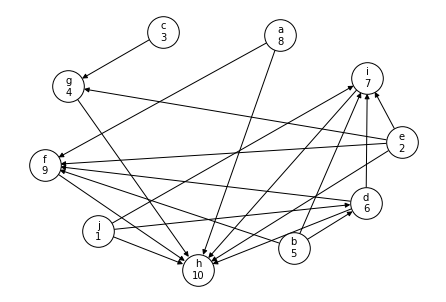

In [27]:
def topological_sort_recursivo(G, visualize=False, verbose=False):
  cont = len(G.nodes())

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      if verbose == True:
        if cont == len(G.nodes()):
          print("Comenzando recorrido post-orden desde el nodo ", end='')
        else:
          print("\nContinuando recorrido post-orden desde el nodo ", end='')
        print(colored(G.nodes[n]['symbol'], 'blue'))

      cont = DFS_recursivo(G, n, cont, verbose)

  if verbose: print()

  if verbose or visualize:
    print("Orden topológico:")
    draw_graph(G)

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
topological_sort_recursivo(G, True)

## 2.2. Descripción del algoritmo

Ambos algoritmos reciben como entrada un grafo sin ciclos (DAG) y retornan el grafo con el valor asignado a cada nodo para cumplir con el orden topológico. Además, los pasos de ambos algoritmos son similares, puesto que la única diferencia radica en la implementación de la función **DFS**. Los pasos para resolver el algoritmo son los siguientes:

1. Se inicializa un contador global con la cantidad total de nodos del grafo.

2. Se llama a la función **DFS** a partir de un nodo no explorado.

3. Se recorren los nodos en **post-orden** y se asigna el valor del contador a cada nodo. Por cada visita, se disminuye el contador en 1.

4. Mientras existan nodos sin explorar, se repiten los pasos 2 y 3.

## 2.3 Ejemplo

El siguiente video muestra un ejemplo con los pasos a seguir para encontrar el orden topológico a partir de un grafo $G$:

In [21]:
from IPython.display import IFrame
IFrame(src='https://www.youtube.com/embed/SGuuJvspwyQ', width='560', height='315')

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en los pasos de cada algoritmo:

In [28]:
from collections import defaultdict
import networkx as nx
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

Comenzando recorrido post-orden desde el nodo i
Obteniendo nodos adyacentes de i: b, f
Obteniendo nodos adyacentes de f: h
Obteniendo nodos adyacentes de h: -
Marcando nodo h con etiqueta 9
Marcando nodo f con etiqueta 8
Obteniendo nodos adyacentes de b: a, c, f, h
Obteniendo nodos adyacentes de c: h
Marcando nodo c con etiqueta 7
Obteniendo nodos adyacentes de a: h, c
Marcando nodo a con etiqueta 6
Marcando nodo b con etiqueta 5
Marcando nodo i con etiqueta 4

Continuando recorrido post-orden desde el nodo d
Obteniendo nodos adyacentes de d: h
Marcando nodo d con etiqueta 3

Continuando recorrido post-orden desde el nodo g
Obteniendo nodos adyacentes de g: c, b, e
Obteniendo nodos adyacentes de e: c, f
Marcando nodo e con etiqueta 2
Marcando nodo g con etiqueta 1

Orden topológico:


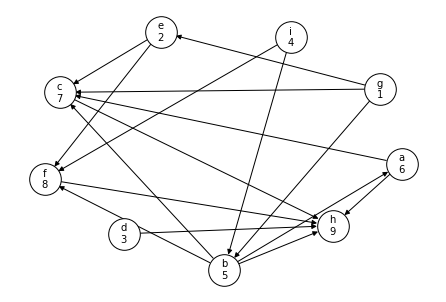

In [29]:
G = graph_instance_creator(10)
G = graph_to_nxdigraph(G)

topological_sort_iterativo(G, True, True)

Comenzando recorrido post-orden desde el nodo d
Obteniendo nodos adyacentes de d: e, h, f, a
Llamando recursivamente a DFS con nodo inicial e
Obteniendo nodos adyacentes de e: h, a
Llamando recursivamente a DFS con nodo inicial h
Obteniendo nodos adyacentes de h: -
Marcando nodo h con etiqueta 10
Llamando recursivamente a DFS con nodo inicial a
Obteniendo nodos adyacentes de a: h
Marcando nodo a con etiqueta 9
Marcando nodo e con etiqueta 8
Llamando recursivamente a DFS con nodo inicial f
Obteniendo nodos adyacentes de f: a, h, c, i
Llamando recursivamente a DFS con nodo inicial c
Obteniendo nodos adyacentes de c: h
Marcando nodo c con etiqueta 7
Llamando recursivamente a DFS con nodo inicial i
Obteniendo nodos adyacentes de i: c, h
Marcando nodo i con etiqueta 6
Marcando nodo f con etiqueta 5
Marcando nodo d con etiqueta 4

Continuando recorrido post-orden desde el nodo b
Obteniendo nodos adyacentes de b: f, h
Marcando nodo b con etiqueta 3

Continuando recorrido post-orden desde el n

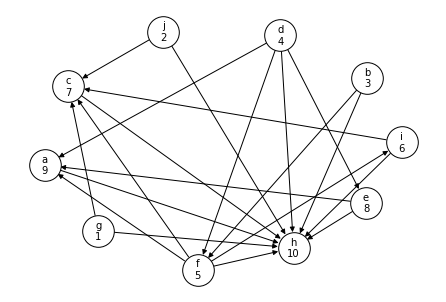

In [30]:
G = graph_instance_creator(10)
G = graph_to_nxdigraph(G)

topological_sort_recursivo(G, True, True)